<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

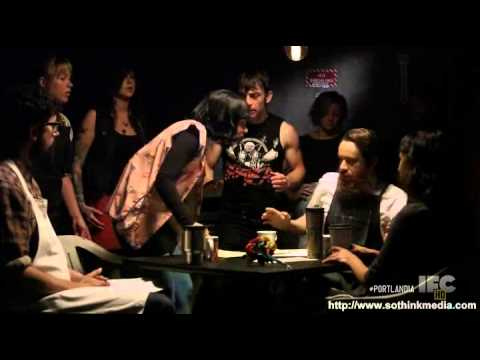

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [1]:
%pwd

'/Users/ekselan/Documents/GitHub/DS-Unit-4-Machine-Learning/1-NLP/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


## Explore the Data (ABW)

In [4]:
# Start here 
print(shops.shape)

(7616, 3)


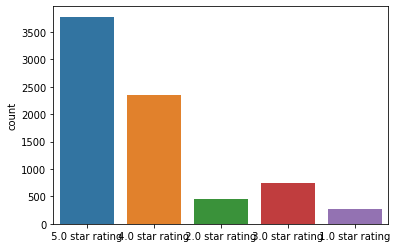

In [8]:
import seaborn as sns
ratings = list(shops['star_rating'])
sns.countplot(ratings);

In [10]:
shops['star_rating'].value_counts(normalize=True)

# Can see that majority of ratings are 5 star ...

 5.0 star rating     0.496324
 4.0 star rating     0.309874
 3.0 star rating     0.096901
 2.0 star rating     0.060399
 1.0 star rating     0.036502
Name: star_rating, dtype: float64

In [11]:
shops['coffee_shop_name'].value_counts()

# Looks like 79 different shops

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

## Clean the data (ABW)

In [100]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [101]:
df = shops.copy()

def wrangle(x):
    """
    Function to wrangle shops data
    """
    # Split text from dates
    dates = []
    texts = []
    for row in x['full_review_text']:
        if "2016" in row:
            row = row.split("2016",1)
            date = row[0]
            text = row[1].strip() #> .strip to remove leading and trailing whitespace
        elif "2015" in row:
            row = row.split("2015",1)
            date = row[0]
            text = row[1].strip()
        elif "2014" in row:
            row = row.split("2014",1)
            date = row[0]
            text = row[1].strip()
        dates.append(date)
        texts.append(text)
    #x['dates'] = dates
    x['texts'] = texts
    
    # Remove "star rating" from review scores and turn them into floats
    scores = []
    for row in x['star_rating']:
        row = row.strip(" star rating")
        scores.append(float(row))
    x['star_rating'] = scores
    
    return x
df = wrangle(df)

In [102]:
df.head()

,coffee_shop_name,full_review_text,star_rating,texts
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,1 check-in Love love loved the atmosphere! Eve...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,"Listed in Date Night: Austin, Ambiance in Aust..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,1 check-in Listed in Brunch Spots I loved the ...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,Very cool decor! Good drinks Nice seating How...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,1 check-in They are located within the Northcr...


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [87]:
"""
Import statements
"""

from collections import Counter

import squarify
import matplotlib.pyplot as plt

import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

In [89]:
def count(docs):
    """
    Function which takes a corpus of document and returns a dataframe
    of word counts to analyze.
    """

    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [117]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df['texts'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [118]:
df['tokens'].head()

0    [1, check-in, Love, love, loved, the, atmosphe...
1    [Listed, in, Date, Night:, Austin,, Ambiance, ...
2    [1, check-in, Listed, in, Brunch, Spots, I, lo...
3    [Very, cool, decor!, Good, drinks, Nice, seati...
4    [1, check-in, They, are, located, within, the,...
Name: tokens, dtype: object

In [119]:
wc = count(df['tokens'])
print(df.shape)
wc.head(15)

(7616, 5)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
53,the,6410,27030,1.0,0.035197,0.035197,0.841649
17,and,6806,24981,2.0,0.032529,0.067727,0.893645
74,a,6061,21153,3.0,0.027545,0.095271,0.795825
31,I,5341,19161,4.0,0.024951,0.120222,0.701287
62,to,5638,16627,5.0,0.021651,0.141873,0.740284
33,,4056,13775,6.0,0.017937,0.159811,0.532563
30,of,4949,11850,7.0,0.015431,0.175241,0.649816
87,is,4848,11394,8.0,0.014837,0.190078,0.636555
8,was,3679,9455,9.0,0.012312,0.202390,0.483062
107,in,4370,8610,10.0,0.011212,0.213602,0.573792


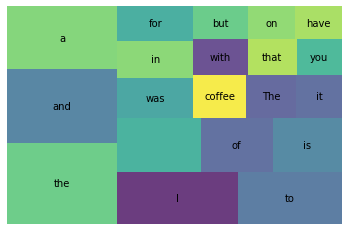

In [123]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Deal with Stop Words (ABW)

In [124]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df['texts'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [125]:
df['tokens'].head()

0    [1, check-in, love, love, loved, atmosphere!, ...
1    [listed, date, night:, austin,, ambiance, aust...
2    [1, check-in, listed, brunch, spots, loved, ec...
3    [cool, decor!, good, drinks, nice, seating,  ,...
4    [1, check-in, located, northcross, mall, shopp...
Name: tokens, dtype: object

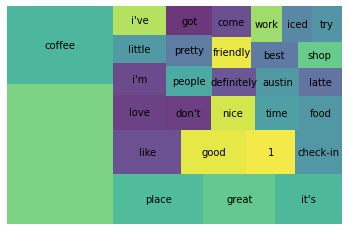

In [126]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 30]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [141]:
# Extend Stop Words

STOP_WORDS = nlp.Defaults.stop_words.union(
    [" ", 
     "1", 
     "check-in", 
     "austin", 
     "i'm", 
     "i've",
     "it's",
     "-"])

In [142]:
tokens = []

for doc in tokenizer.pipe(df['texts'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [143]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
14,coffee,4132,7669,1.0,0.020758,0.020758,0.542542
114,place,2936,4144,2.0,0.011217,0.031974,0.385504
156,great,2493,3325,3.0,0.009000,0.040974,0.327337
182,like,1989,2836,4.0,0.007676,0.048650,0.261161
186,good,2012,2692,5.0,0.007286,0.055937,0.264181


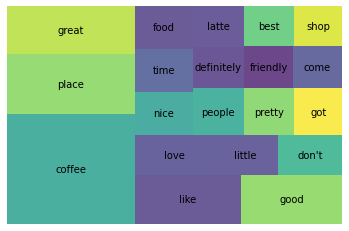

In [144]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Get Lemmas (ABW)

In [146]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [147]:
df['lemmas'] = df['texts'].apply(get_lemmas)

In [148]:
df['lemmas'].head()

0    [1, check, Love, love, love, atmosphere, corne...
1    [list, Date, Night, Austin, Ambiance, Austin, ...
2    [1, check, list, Brunch, Spots, love, eclectic...
3    [cool, decor, good, drink, nice, seating,  ,  ...
4    [1, check, locate, Northcross, mall, shopping,...
Name: lemmas, dtype: object

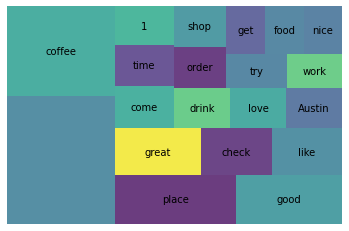

In [149]:
wc = count(df['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

# The custom stop word technique worked better for me than lemmatization,
# as some of the "words" I wanted to remove have come back. I could see
# how different problems would be better suited to different approaches though.
# For example, the larger the list you need for custom stop words, I'd imagine
# the greater benefit you'd get from lemmatization.

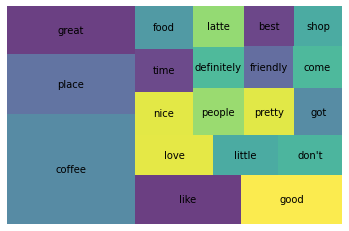

In [150]:
# Back to Custom Stop Words technique

wc = count(df['tokens'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Early Analysis (ABW)

- Since we already know that nearly 80% of the reviews are "good" (5 or 4 star), we can begin to associate the most popular word counts with positive reviews.
- Words like good, great, nice, love, friendly and pretty were popular among positive reviews, which would be as expected
- A more interesting word was "food" which makes me want to dig in more ... are these reviews praising cofee shops for having/not having food? For having very good food? Cheap food? Etc

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [151]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
14,coffee,4132,7669,1.0,0.020758,0.020758,0.542542
114,place,2936,4144,2.0,0.011217,0.031974,0.385504
156,great,2493,3325,3.0,0.009000,0.040974,0.327337
182,like,1989,2836,4.0,0.007676,0.048650,0.261161
186,good,2012,2692,5.0,0.007286,0.055937,0.264181


## Create two subsets of df: one with good reviews, one with bad (ABW)

In [155]:
print(df.shape)
df.head()

(7616, 6)


,coffee_shop_name,full_review_text,star_rating,texts,tokens,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,1 check-in Love love loved the atmosphere! Eve...,"[love, love, loved, atmosphere!, corner, coffe...","[1, check, Love, love, love, atmosphere, corne..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,"Listed in Date Night: Austin, Ambiance in Aust...","[listed, date, night:, austin,, ambiance, beau...","[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,1 check-in Listed in Brunch Spots I loved the ...,"[listed, brunch, spots, loved, eclectic, homey...","[1, check, list, Brunch, Spots, love, eclectic..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,Very cool decor! Good drinks Nice seating How...,"[cool, decor!, good, drinks, nice, seating, ho...","[cool, decor, good, drink, nice, seating, , ..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,1 check-in They are located within the Northcr...,"[located, northcross, mall, shopping, center, ...","[1, check, locate, Northcross, mall, shopping,..."


In [167]:
# "Good Review" dataframe

good_revs = df[df['star_rating'] >= 4.0]
print(good_revs.shape)
print("GOOD REVIEWS")
good_revs.head()

(6140, 6)
GOOD REVIEWS


,coffee_shop_name,full_review_text,star_rating,texts,tokens,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,1 check-in Love love loved the atmosphere! Eve...,"[love, love, loved, atmosphere!, corner, coffe...","[1, check, Love, love, love, atmosphere, corne..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,"Listed in Date Night: Austin, Ambiance in Aust...","[listed, date, night:, austin,, ambiance, beau...","[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,1 check-in Listed in Brunch Spots I loved the ...,"[listed, brunch, spots, loved, eclectic, homey...","[1, check, list, Brunch, Spots, love, eclectic..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,1 check-in They are located within the Northcr...,"[located, northcross, mall, shopping, center, ...","[1, check, locate, Northcross, mall, shopping,..."
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0,1 check-in Very cute cafe! I think from the mo...,"[cute, cafe!, think, moment, stepped, in,, was...","[1, check, cute, cafe, think, moment, step, fi..."


In [168]:
# "Bad Review" dataframe

bad_revs = df[df['star_rating'] < 4.0]
print(bad_revs.shape)
print("BAD REVIEWS")
bad_revs.head()

(1476, 6)
BAD REVIEWS


,coffee_shop_name,full_review_text,star_rating,texts,tokens,lemmas
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,Very cool decor! Good drinks Nice seating How...,"[cool, decor!, good, drinks, nice, seating, ho...","[cool, decor, good, drink, nice, seating, , ..."
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0,"1 check-in Ok, let's try this approach... Pro...","[ok,, let's, try, approach..., pros:, music, s...","[1, check, ok, let, try, approach, , pro, mus..."
11,The Factory - Cafe With a Soul,"11/20/2016 The store has A+ decoration, but h...",3.0,"The store has A+ decoration, but honestly, the...","[store, a+, decoration,, honestly,, coffee, go...","[store, a+, decoration, honestly, coffee, good..."
12,The Factory - Cafe With a Soul,11/17/2016 1 check-in Listed in 2016 - The Th...,3.0,1 check-in Listed in 2016 - The Third Time is ...,"[listed, 2016, time, charm!, factory, a+, deco...","[1, check, list, 2016, time, Charm, Factory, a..."
25,The Factory - Cafe With a Soul,"12/2/2016 Okay, so after visiting my friends ...",1.0,"Okay, so after visiting my friends in LA and t...","[okay,, visiting, friends, la, trying, mint, m...","[okay, visit, friend, LA, try, mint, mojito, i..."


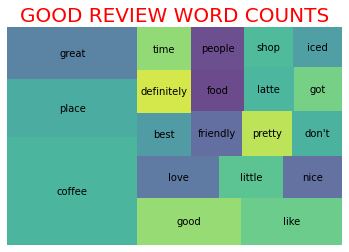

In [174]:
# "Good review" word counts

good_wc = count(good_revs['tokens'])
good_wc_top20 = good_wc[good_wc['rank'] <= 20]

squarify.plot(sizes=good_wc_top20['pct_total'], label=good_wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.title("GOOD REVIEW WORD COUNTS", color="red", fontsize=20)
plt.show()

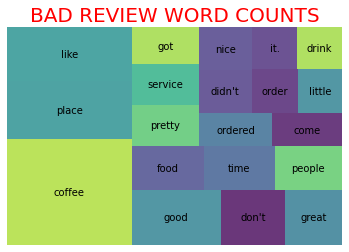

In [175]:
# "Bad review" word counts

bad_wc = count(bad_revs['tokens'])
bad_wc_top20 = bad_wc[bad_wc['rank'] <= 20]

squarify.plot(sizes=bad_wc_top20['pct_total'], label=bad_wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.title("BAD REVIEW WORD COUNTS", color="red", fontsize=20)
plt.show()

In [176]:
good_wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
14,coffee,3326,6112,1.0,0.021291,0.021291,0.541694
114,place,2356,3290,2.0,0.011461,0.032752,0.383713
156,great,2213,2953,3.0,0.010287,0.043038,0.360423
275,good,1582,2112,4.0,0.007357,0.050396,0.257655
239,like,1471,2054,5.0,0.007155,0.057551,0.239577


In [177]:
bad_wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
11,coffee,806,1557,1.0,0.018900,0.018900,0.546070
122,place,580,854,2.0,0.010366,0.029266,0.392954
29,like,518,782,3.0,0.009492,0.038758,0.350949
33,good,430,580,4.0,0.007040,0.045798,0.291328
206,don't,327,416,5.0,0.005050,0.050848,0.221545


This looks to be headed in the right direction, as it would make sense that the word "coffee" (and "place") appears in both sets of reviews at the same rate. Next step is to combine this data to calculate differences in the ```appears_in_pct```.

In [191]:
merged_wc = good_wc.merge(bad_wc,
                          how='inner',
                          on=['word'],
                          suffixes=('_good','_bad')
                         )
print(merged_wc.shape)
merged_wc.head()

# Not sure why this shape is larger than either df, looked into it and seems
# it may have something to do with duplicates in both/either df, but
# 1. df.drop_duplicates() is returning errors, and
# 2. based on how these wc dfs are created, there should not be duplicates ...

(9231, 13)


,word,appears_in_good,count_good,rank_good,pct_total_good,cul_pct_total_good,appears_in_pct_good,appears_in_bad,count_bad,rank_bad,pct_total_bad,cul_pct_total_bad,appears_in_pct_bad
0,coffee,3326,6112,1.0,0.021291,0.021291,0.541694,806,1557,1.0,0.018900,0.018900,0.546070
1,place,2356,3290,2.0,0.011461,0.032752,0.383713,580,854,2.0,0.010366,0.029266,0.392954
2,great,2213,2953,3.0,0.010287,0.043038,0.360423,280,372,6.0,0.004515,0.055363,0.189702
3,good,1582,2112,4.0,0.007357,0.050396,0.257655,430,580,4.0,0.007040,0.045798,0.291328
4,like,1471,2054,5.0,0.007155,0.057551,0.239577,518,782,3.0,0.009492,0.038758,0.350949


In [201]:
merged_wc["appearance_pct_diff"] = merged_wc["appears_in_pct_good"] - merged_wc["appears_in_pct_bad"]
mwc = merged_wc.drop(["count_good",
                "count_bad",
                "rank_good",
                "rank_bad",
                "pct_total_good",
                "pct_total_bad",
                "cul_pct_total_good",
                "cul_pct_total_bad"], axis=1)
mwc.head()

,word,appears_in_good,appears_in_pct_good,appears_in_bad,appears_in_pct_bad,appearance_pct_diff
0,coffee,3326,0.541694,806,0.546070,-0.004377
1,place,2356,0.383713,580,0.392954,-0.009241
2,great,2213,0.360423,280,0.189702,0.170722
3,good,1582,0.257655,430,0.291328,-0.033673
4,like,1471,0.239577,518,0.350949,-0.111372


In [205]:
mwc.sort_values(by="appearance_pct_diff", ascending=False)[:10]

,word,appears_in_good,appears_in_pct_good,appears_in_bad,appears_in_pct_bad,appearance_pct_diff
2,great,2213,0.360423,280,0.189702,0.170722
8,best,886,0.144300,79,0.053523,0.090777
5,love,1188,0.193485,169,0.114499,0.078987
33,delicious,606,0.098697,33,0.022358,0.076339
22,check-ins,824,0.134202,90,0.060976,0.073226
11,friendly,961,0.156515,130,0.088076,0.068439
43,perfect,525,0.085505,33,0.022358,0.063147
9,definitely,897,0.146091,125,0.084688,0.061403
35,favorite,555,0.090391,49,0.033198,0.057193
84,amazing,382,0.062215,33,0.022358,0.039857


In [206]:
mwc.sort_values(by="appearance_pct_diff")[:10]

,word,appears_in_good,appears_in_pct_good,appears_in_bad,appears_in_pct_bad,appearance_pct_diff
4,like,1471,0.239577,518,0.350949,-0.111372
13,don't,803,0.130782,327,0.221545,-0.090763
32,service,604,0.098371,266,0.180217,-0.081845
69,didn't,394,0.064169,207,0.140244,-0.076075
286,asked,147,0.023941,138,0.093496,-0.069555
34,ordered,554,0.090228,232,0.157182,-0.066954
146,wasn't,236,0.038436,153,0.103659,-0.065222
191,maybe,206,0.033550,145,0.098238,-0.064688
119,better,303,0.049349,154,0.104336,-0.054988
12,pretty,783,0.127524,268,0.181572,-0.054047


(ABW)
The 5 words with greatest difference are:
- "great": found in good reviews with 17% more frequency than bad (almost 2x the rate)
- "like": found in bad reviews with 11% more frequency than good
- "best": found in good reviews with 9% more frequency than bad (almost 3x the rate)
- "don't": found in bad reviews with 9% more frequency than good
- "service": found in bad reviews with 8% more frequency than good (almost 2x the rate)

## Final Analysis (ABW)

We can see that the five words with greatest frequency difference are great, like, best, don't and service. 

In particular, great, best and service had the greatest differences. For example, service appeared in only 18% of bad reviews, but when compared to the rate in good reviews (about 9%), we can see that this word was twice as likely to appear in a negative review. 

Similarly, "great" was almost twice as likely to appear in positive reviews and "best" was almost three times as likely to appear in positive reviews.

It's also worth noting that negative suffixes (n't, such as don't or didn't) were more common among negative reviews, and adjectives (favorite, amazing, best, great) were more common in positive reviews.

If I were in management and wanted to implement changes from these findings, I would focus on things such as order accuracy and customer service. Words like "asked", "ordered" and "service" could be indicating customer dissatisfaction on their order experience.

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

